# High-energy radiation and pair production by Coulomb processes in particle-in-cell simulations

Authors of paper: B. Martinez, M. Lobet, R. Duclous, et al. Phys. Plasmas 26, 103109 (2019)

Link to paper: https://pubs.aip.org/aip/pop/article/26/10/103109/264054/High-energy-radiation-and-pair-production-by

Notebook: Óscar Amaro, November 2023 @ GoLP-EPP

Original implementation of QED rates by Bertrand Martinez. See https://github.com/bertrandmartinez/benchmark_osiris_qed for Python scripts to compute QED-Coulomb rates.

Dotted - data extracted from plots using WebPlotDigitizer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
# scipy
from scipy.integrate import quad
from scipy.constants import c, e, m_e, epsilon_0, mu_0, N_A, k, h, hbar, alpha, value
r_e = value('classical electron radius')

import qed_rates
from qed_rates import*

### Figure 3: Nonrelativistic bremsstrahlung

Copper, 100 keV electron

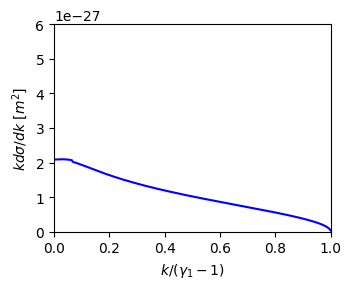

In [2]:
gpdim = 300
Z = 29 # Copper
# 
p1 = 100e3/0.511e6 #[]
g1 = p1+1
klst = np.linspace(1e-3, 1-1e-3, gpdim)*(g1-1)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
plt.plot(klst/(g1-1), klst*np.array([nr_cs_dif(Z, k, g1) for k in klst]), 'b-')
plt.xlim([0,1])
plt.ylim([0,6e-27])
plt.xlabel(r'$k/(\gamma_1-1)$')
plt.ylabel(r'$kd\sigma/dk~[m^2]$')
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=3/4/axesratio)
plt.tight_layout()
plt.show()

# Figure 5: Relativistic Bremsstrahlung

Copper, 5 MeV electron

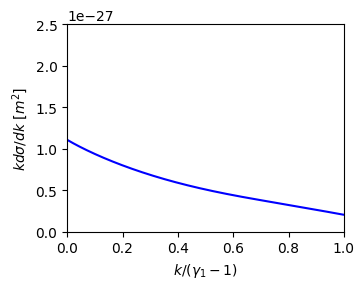

In [3]:
gpdim = 300
Z = 29 # Copper
# 
p1 = 5e6/0.511e6 #[]
g1 = p1+1
klst = np.linspace(1e-3, 1-1e-3, gpdim)*(g1-1)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
plt.plot(klst/(g1-1), klst*np.array([mr_cs_dif(Z, k, g1) for k in klst]), 'b-')
plt.xlim([0,1])
plt.ylim([0,2.5e-27])
plt.xlabel(r'$k/(\gamma_1-1)$')
plt.ylabel(r'$kd\sigma/dk~[m^2]$')
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=3/4/axesratio)
plt.tight_layout()
plt.show()

# Figure 7: UltraRelativistic Bremsstrahlung

Copper, 100 MeV electron

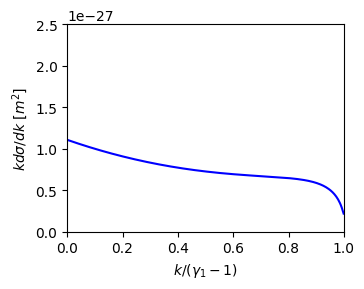

In [4]:
gpdim = 300
Z = 29 # Copper
# 
p1 = 100e6/0.511e6 #[]
g1 = p1+1
klst = np.linspace(1e-3, 1-1e-3, gpdim)*(g1-1)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
plt.plot(klst/(g1-1), klst*np.array([ur_cs_dif(Z, k, g1) for k in klst]), 'b-')
plt.xlim([0,1])
plt.ylim([0,2.5e-27])
plt.xlabel(r'$k/(\gamma_1-1)$')
plt.ylabel(r'$kd\sigma/dk~[m^2]$')
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=3/4/axesratio)
plt.tight_layout()
plt.show()

### Figure 8: Bethe-Heitler cross section

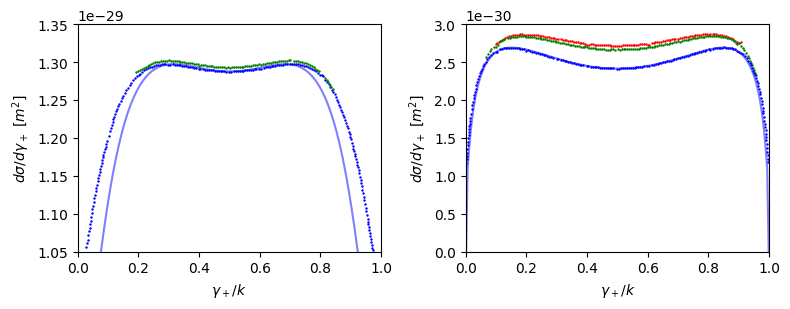

In [5]:
mrksz = 1.5
gpdim = 200
Z = 29 # Copper

# Fig8a
k = 10e6/0.511e6 #[]
gplst = np.linspace(1e-3, 1-1e-3, gpdim)*k
y = np.array([bh_cs_dif(gp, k, Z) for gp in gplst])

#
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
axes[0].plot(gplst/k, y, 'b-', alpha=0.5)
#
f = open('dataWebPlot/fig8a/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs], datatmp2[:,1][indxs]*1e-29,'b.',markersize=mrksz)
#
f = open('dataWebPlot/fig8a/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs], datatmp2[:,1][indxs]*1e-29,'g.',markersize=mrksz)


# Fig8b
k = 100e6/0.511e6 #[]
gplst = np.linspace(1e-3, 1-1e-3, gpdim)*k
y = np.array([bh_cs_dif(gp, k, Z) for gp in gplst])
#
axes[1].plot(gplst/k, y, 'b-', alpha=0.5)
#
f = open('dataWebPlot/fig8b/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs], datatmp2[:,1][indxs]*1e-30,'r.',markersize=mrksz)
#
f = open('dataWebPlot/fig8b/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs], datatmp2[:,1][indxs]*1e-30,'g.',markersize=mrksz)
#
f = open('dataWebPlot/fig8b/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs], datatmp2[:,1][indxs]*1e-30,'b.',markersize=mrksz)


axes[0].set_ylim([1.05e-29,1.35e-29])
axes[1].set_ylim([0,3e-30])
#
for i in range(2):
    axes[i].set_xlim([0,1])
    axes[i].set_xlabel(r'$\gamma_+/k$')
    axes[i].set_ylabel(r'$d\sigma/d\gamma_+ ~[m^2]$')
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    axesratio = (ymax-ymin)/(xmax-xmin)
    axes[i].set_aspect(aspect=3/4/axesratio)

plt.tight_layout()
plt.show()